In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

array([[47, 46, 46, ..., 45, 45, 45],
       [45, 45, 45, ..., 45, 45, 45],
       [45, 45, 45, ..., 45, 45, 45],
       ...,
       [45, 41, 46, ..., 46, 46, 43],
       [44, 45, 45, ..., 44, 44, 44],
       [44, 45, 45, ..., 45, 45, 45]], dtype=uint8)

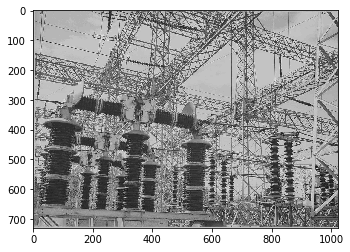

In [31]:
# Q1
img=cv2.imread('ansel_adams.jpg', 0)
plt.imshow(img, 'gray')
img

In [32]:
a=0
b=255
c=img.min()
d=img.max()
c,d

(5, 57)

In [33]:
Tr=(img-c)*((b-a)/(d-c))+a
Tr

array([[205.96153846, 201.05769231, 201.05769231, ..., 196.15384615,
        196.15384615, 196.15384615],
       [196.15384615, 196.15384615, 196.15384615, ..., 196.15384615,
        196.15384615, 196.15384615],
       [196.15384615, 196.15384615, 196.15384615, ..., 196.15384615,
        196.15384615, 196.15384615],
       ...,
       [196.15384615, 176.53846154, 201.05769231, ..., 201.05769231,
        201.05769231, 186.34615385],
       [191.25      , 196.15384615, 196.15384615, ..., 191.25      ,
        191.25      , 191.25      ],
       [191.25      , 196.15384615, 196.15384615, ..., 196.15384615,
        196.15384615, 196.15384615]])

True

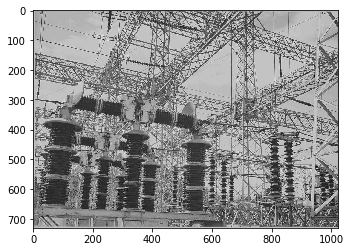

In [34]:
plt.imshow(Tr,'gray')
# Can I store float as png by using cv?
cv2.imwrite('Q1.png', Tr)

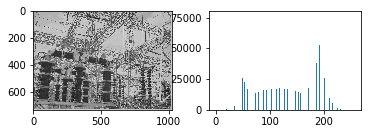

In [78]:
# Q2
def Q2():
    plt.subplot(2,2,1), plt.imshow(Tr, 'gray')
    plt.subplot(2,2,2), plt.hist(Tr.ravel(), 256, [0,256])
    plt.show()
Q2()

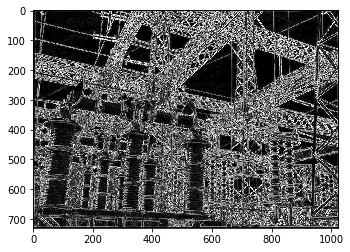

In [79]:
# Q3
def Q3():
    sobelx=cv2.Sobel(Tr,cv2.CV_64F, 1, 0, ksize=3)
    sobelx=cv2.convertScaleAbs(sobelx)
    sobely=cv2.Sobel(Tr,cv2.CV_64F, 0, 1, ksize=3)
    sobely=cv2.convertScaleAbs(sobely)
    sobelxy=cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
    plt.imshow(sobelxy,'gray')
    cv2.imwrite('Q3.png',sobelxy)
Q3()

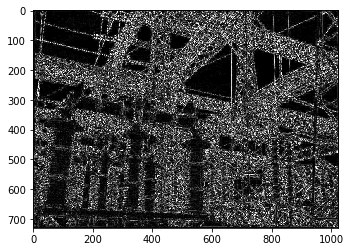

In [76]:
# Q4
def Q4():
    laplacian=cv2.Laplacian(Tr, cv2.CV_64F)
    laplacian=cv2.convertScaleAbs(laplacian)
    plt.imshow(laplacian,'gray')
    cv2.imwrite('Q4.png',laplacian)
Q4()

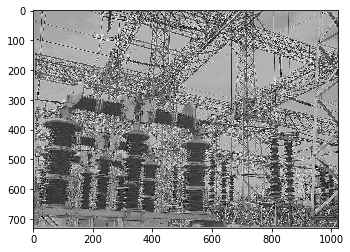

In [74]:
k=np.array((
        [0, -1, 0],
        [-1, 8, -1],
        [0, -1, 0]))
dst=cv2.filter2D(img,-1,k)
plt.imshow(dst,'gray')